In [2]:
import fasttext

def handle_file_data():
    from pyvi.ViTokenizer import tokenize
    with open('data.txt','r') as f:
        lines = f.readlines()
        new_data = ""
        for line in lines:
            new_data += tokenize(line) + "\n"

        with open('data_handle.txt','w') as fout:
            fout.write(new_data)

def test():
    model = fasttext.load_model("C:/Jupyter_workplace/NLP_2020_Grad/Word_embedings/FastText/model_full__skipgram.bin")

    print("============= cố_gắng ===========")
    for item in model.get_nearest_neighbors('cố_gắng'):
      print(item)
    print("============= hỗ_trợ ===========")
    for item in model.get_nearest_neighbors('hỗ_trợ'):
      print(item)
    print("============= cần_sa ===========")
    for item in model.get_nearest_neighbors('cần_sa'):
      print(item)
    print("============= bún_bò ===========")
    for item in model.get_nearest_neighbors('bún_bò'):
      print(item)
if __name__ == '__main__':
    # train()
    test()

============= cố_gắng ===========
(0.8158331513404846, 'cố_gắng_gượng')
(0.7206988334655762, 'nỗ_lực')
(0.687046229839325, 'gắng')
(0.6855678558349609, 'quyết_tâm')
(0.6810990571975708, 'chúng_tôi')
(0.6745805144309998, 'sự_cố_gắng')
(0.6724857091903687, 'siêng_năng')
(0.6685042381286621, 'hết_mình')
(0.6647743582725525, 'ngừng_nghỉ')
(0.654014527797699, 'tự_nhủ')
============= hỗ_trợ ===========
(0.839778482913971, 'hỗ_trợ_giúp')
(0.7801660299301147, 'hỗ_trợ_từ')
(0.7079092264175415, 'trợ_giúp')
(0.7003790140151978, 'hỗ_trợ_cấp')
(0.6696867942810059, 'tài_trợ')
(0.6694825291633606, 'aw3d')
(0.6641325354576111, 'hỗ_trợ_giá')
(0.6273260712623596, 'tư_vấn_đề_xuất')
(0.6168469190597534, 'kết_hợp_đồng_thời')
(0.6152690052986145, 'miễn_giảm')
============= cần_sa ===========
(0.7437477111816406, 'cocaine')
(0.73469477891922, 'thuốc_phiện')
(0.7341757416725159, 'amphetamine')
(0.725642740726471, 'methamphetamine')
(0.7203742265701294, 'shisha')
(0.7074910402297974, 'amphetamin')
(0.687866687

In [3]:
import fasttext as ft
model = ft.load_model("C:/Jupyter_workplace/NLP_2020_Grad/Word_embedings/FastText/model_full__skipgram.bin")

In [6]:
print(model.get_word_vector('thực_hành'))

[ 0.20687482  0.15362109  0.28328818 -0.11661215  0.11024419  0.00633163
 -0.8769941  -0.44862962  0.59593254 -0.23618959 -0.4756729   0.09514725
 -0.34608886  0.09940916  0.24918385 -0.16010012  0.42803934 -0.29911172
 -0.52729714  0.13884082 -0.70628697  0.2756171  -0.1129265  -0.06102648
 -0.1445536   0.20399527 -0.26562107 -0.49621382 -0.4111376   0.15295357
 -0.1567545  -0.41523537  0.10244443  0.03462357 -0.468621    0.44608867
  0.15307128 -0.50020015  0.06006098 -0.23655164  0.12896156 -0.12897061
  0.3177377  -0.62972254 -0.15598929  0.8730615  -0.27348542  0.35710907
 -0.11673039  0.01276447 -0.61984926  0.54815006  0.17981397  0.63185376
  0.31745592  0.23581447 -0.10440147 -0.7185796   0.65676475 -0.15374039
  0.08078125 -0.21398379  0.26071846  0.3218749  -0.00741809  0.15584263
  0.40090546  0.07396564  0.47540188  0.2976235  -0.28244123 -0.33211368
 -0.29178837 -0.15566035 -0.20936935 -0.43197334 -0.2527047  -0.30560628
 -0.05253061  0.03206588  0.00350583 -0.04549419  0

In [10]:
for i in range(3,7):
    print(i)
    for item in model.get_subwords('thực_hành')[0]:  
        if len(item) == i:
            print(item, end=', ')

3
<th, thự, hực, ực_, c_h, _hà, hàn, ành, nh>, 4
<thự, thực, hực_, ực_h, c_hà, _hàn, hành, ành>, 5
<thực, thực_, hực_h, ực_hà, c_hàn, _hành, hành>, 6
<thực_, thực_h, hực_hà, ực_hàn, c_hành, _hành>, 

In [11]:
import numpy as np 
vector = model.get_subwords('thực hành')[1]
s = []
for v in vector:
  s.append(model.get_input_vector(v))

su = np.mean(s,axis=0)

In [20]:
import glob 
import json
import random
# import thư viện

import json
import random
import os
import glob
from random import randint 
from gensim import corpora, matutils
import pickle as cPickle   
from pyvi import ViTokenizer 
from tqdm import trange, tqdm_notebook
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer,LabelEncoder

# tạo class đọc file 
class FileReader(object):
    def __init__(self, file_path, encoder = None):
        self.file_path = file_path
        self.encoder = encoder if encoder != None else 'utf-16le'

    def read(self):
        with open(self.file_path,'rb') as f:
            s = f.read() 
        return s

    def content(self):
        s = self.read() 
        return s.decode(self.encoder)

    def read_json(self):
        with open(self.file_path) as f:
            s = json.load(f)
        return s
        
    def read_stopwords(self):
        with open(self.file_path, 'r') as f:
            stopwords = set([w.strip().replace(' ', '_') for w in f.readlines()])
        return stopwords

    def load_dictionary(self):
        return corpora.Dictionary.load_from_text(self.file_path)


In [21]:

class FileStore(object):
    def __init__(self, file_path, data = None):
        self.file_path = file_path
        self.data = data

    def store_json(self):
        print("Save: ",self.file_path)
        with open(self.file_path, 'w') as outfile:
            json.dump(self.data, outfile)

    # store dictionary: https://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary.filter_extremes
    # dict_word là mãng chữa các đoạn text đã được segmentation [[cá, con, ăn],[con, mèo],[con, chó, chạy, qua]]
    # len của dictionary sẽ là 7 
    # no_above là tần suất xuất hiện trên số phần trăm ví dụ: no_above = 0.5 là tần suất xuất hiện không được trên (phải dưới) của tổng số tài liệu 50%
    # no_below là số lần xuất hiện không được dưới ... ví dụ no_below = 2 là số lần xuất hiện trong từng tài liệu không được dưới 2
    def store_dictionary(self, dict_words):
        dictionary = corpora.Dictionary(dict_words)
        dictionary.filter_extremes(no_below=170, no_above=0.3) 
        dictionary.save_as_text(self.file_path)
 

    def save_pickle(self,  obj):
        outfile = open(self.file_path, 'wb')
        fastPickler = cPickle.Pickler(outfile, 4)
        fastPickler.fast = 1
        fastPickler.dump(obj)
        outfile.close()

In [22]:
DATA_TRAIN_PATH = '/content/drive/My Drive/NLP/dataset/Train_Full' 
DATA_TRAIN_JSON = '/content/drive/My Drive/NLP/nlp_me/json/train.json'

STOP_WORDS = '/content/drive/My Drive/NLP/nlp_me/stopwords-nlp-vi.txt'
SPECIAL_CHARACTER = '0123456789%@$.,=+-!;/()*"&^:#|\n\t\''
DICTIONARY_PATH = '/content/drive/My Drive/NLP/nlp_me/dictionary.txt'

In [23]:
# đọc file train
train_loader = FileReader(file_path=DATA_TRAIN_JSON) 
data_train_raw = train_loader.read_json()
print('Total data train: %d' %len(data_train_raw))
random.shuffle(data_train_raw)

Total data train: 105800


In [24]:
dic = dict() 
dic_count = dict()
NUM_RANDOM = random.randint(2000,2500) 
for item in data_train_raw:
  if item['category'] not in dic.keys():
    dic[item['category']] = NUM_RANDOM
    dic_count[item['category']] = 0
  if len(dic.keys()) > 10:
    break

In [25]:
data_train = []
data_validate = []
for item in data_train_raw:  
  try:
    if dic[item['category']] > dic_count[item['category']]:
      data_train.append(item)
      dic_count[item['category']]+=1
    if dic[item['category']] < dic_count[item['category']]:
      data_validate.append(item) 
  except:
    continue

In [26]:
len(data_train)

22649

In [ ]:
# xây dựng class NLP extends từ pyvi để extract feature 
class NLP(object):
    def __init__(self, text = None):
        self.text = text
        self.__set_stopwords()

    #đọc file stop_word đã chứa sẵn trong đường dẫn
    def __set_stopwords(self):
        self.stopwords = FileReader(STOP_WORDS).read_stopwords()

    # vì trong câu sẽ xuất hiện rất nhiều từ vô nghĩa, sẽ làm noise dữ liệu cho nên phải segmentation trước khi train. Sử dụng ViTokenizer từ Pyvi 
    # để tokenize (đây là một model do người việt đã làm để segmentation tiếng việt)
    def segmentation(self):
        return ViTokenizer.tokenize(self.text)

    # loại bỏ kí tự đặc biệt, lowercase và segmentation tiếng việt
    def split_words(self):
        text = self.segmentation()
        try:
            return [x.strip(SPECIAL_CHARACTER).lower() for x in text.split()]
        except TypeError:
            return []

    # get feature trong câu gồm hai bước 
    # loại bỏ kí tự đặc biệt và loại bỏ stop_words - stop_word là những từ vô nghĩa không mang lại hiệu quả train 
    def get_words_feature(self):
        split_words = self.split_words()
        return [word for word in split_words if word.encode('utf-8') not in self.stopwords]


In [27]:
# extract feature 
# build dictionary để chuyển embedding dữ liệu, chuyển về word2vec => bag of word
from past.builtins import xrange
class FeatureExtraction(object):
    def __init__(self, data=None, build_dic=False):
        self.data = data
        self.build_dic = build_dic

    # build từ điển gồm các từ xuất hiện trong văn bản sau khi đã preprocess dữ liệu 
    def __build_dictionary(self):
        print('Building dictionary')
        dict_words = []  
        for i in tqdm_notebook(range(len(self.data)), desc='build dictionary'): 
          if self.data[i]['category'].split('.')[0] != 'My': 
            words = NLP(text = self.data[i]['content']).get_words_feature()
            dict_words.append(words)  
        FileStore(file_path=DICTIONARY_PATH).store_dictionary(dict_words)
       
        self.dictionary = FileReader(DICTIONARY_PATH).load_dictionary()
    # extract feature từ từ điển đã tạo cùng với label
    # x sẽ là word2vec, y là label
    def __build_dataset(self):
        self.features = []
        self.labels = [] 
        for i in tqdm_notebook(xrange(len(self.data)), desc='build dataset'): 
            # if self.data[i]['category'].split('.')[0] != 'My':
            # for key, value in dic.items():
            #   print(key, value)
            content = self.get_dense(self.data[i]['content'])
            self.features.append(content)
            self.labels.append(self.data[i]['category'])
              # if str(self.data[i]['category'].split('.')[1]) == 'Chinh_tri_doi_ngoai' or str(self.data[i]['category'].split('.')[1]) == 'Chinh_tri_noi_bo':
              #   self.labels.append(str(self.data[i]['category'])+'.Chinh_tri')
              # else:
              #   self.labels.append(str(self.data[i]['category'])+'.'+str(self.data[i]['category'].split('.')[1]))

    # def get_dense(self, text):
    #     self.__load_dictionary()
    #     words = NLP(text).get_words_feature()
    #     # Bag of words
    #     vec = self.dictionary.doc2bow(words)  
    #     dense = list(matutils.corpus2dense([vec], num_terms=len(self.dictionary)).T[0])
    #     return dense

    def get_dense(self, text):
        words = NLP(text).get_words_feature()
        vec = []
        for w in words:
          vec.append(model.get_word_vector(w))
        return np.sum(vec, axis=0)

    def get_data_and_label(self):
        print("** Start build dataset")
        self.__build_dataset()  
        return self.features, self.labels

In [28]:

features_train, labels_train = FeatureExtraction(data=data_train, build_dic=False).get_data_and_label() 

** Start build dataset


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [149]:
# load data hơi lâu nên để hai biến giữ lại data ban dầu 
# a, b = np.array(features_train),np.array(labels_train) 
x, y = np.array(features_train),np.array(labels_train)
 

In [150]:
from keras.utils import to_categorical

# encode label 
mlb = LabelEncoder() 
k = mlb.fit_transform(y)
# one hot encoding 
y = to_categorical(k)

In [151]:
from sklearn.model_selection import train_test_split
# chia tập train, test theo tỉ lệ 8:2   
(x_train,x_test, y_train, y_test) = train_test_split(x, y, test_size=0.2, random_state=43)
y_train.shape

(18119, 11)

In [152]:
print('Shape features:',"Total document",y_train.shape[0] + y_test.shape[0],"- Size matrix train (size dictionary)",x_train.shape)
print('Train set',y_train.shape[0],'docs') 
print('Test set',y_test.shape[0],'docs') 
print("Shape",x.shape,y.shape)
SIZE_TRAIN = x_train.shape[1]
y_test[0]


Shape features: Total document 22649 - Size matrix train (size dictionary) (18119, 100)
Train set 18119 docs
Test set 4530 docs
Shape (22649, 100) (22649, 11)


array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [153]:
print("- tổng số label:")
# loop over each of the possible class labels and show them
for (i, label) in enumerate(mlb.classes_):
	print("{}. {}".format(i + 1, label)) 

- tổng số label:
1. Cong_nghe
2. Du_lich
3. Giai_tri
4. Giao_duc
5. Khoa_hoc
6. Phap_luat
7. Suc_khoe
8. Thi_truong
9. Thi_truong_chung_khoan
10. Tin_tuc
11. Xe


In [155]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Dense, Flatten, Dropout
from keras import backend as K
from keras.optimizers import Adam, SGD 
from keras.layers import LeakyReLU
from sklearn.metrics import classification_report
# from tensorflow.python.keras.layers import Dense
# from tensorflow.python.keras import Sequential

# xây dựng mạng network
class ModelNLP(object):
  @staticmethod
  def build(SIZE_TRAIN,num_classes, final_activation):
    model = Sequential()
    model.add(Dense(700, input_shape=(SIZE_TRAIN,), activation='tanh', kernel_initializer="uniform")) 
    model.add(LeakyReLU(alpha=0.3))        
    model.add(Dropout(rate=0.2)) 
    model.add(Dense(600))      
    model.add(LeakyReLU(alpha=0.3))  
    model.add(Dropout(rate=0.2)) 
    model.add(Dense(500))      
    model.add(LeakyReLU(alpha=0.3))        
    model.add(Dropout(rate=0.2))
    model.add(Dense(400))      
    model.add(LeakyReLU(alpha=0.3))        
    model.add(Dropout(rate=0.2))
    model.add(Dense(300))    
    model.add(Dense(num_classes, activation=final_activation))
  
    return model
# !pip install tensorflow==1.14
# khởi tạo model
EPOCHS = 20
INIT_LR = 1e-3
BS = 32

model = ModelNLP.build(SIZE_TRAIN=SIZE_TRAIN,num_classes=len(mlb.classes_),final_activation='softmax')
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
sgd = SGD(lr=0.001); 
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 700)               70700     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 700)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 600)               420600    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 600)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 500)             

In [156]:
# training 
H = model.fit(x_train, y_train, validation_data= (x_test,y_test),epochs=20, verbose=1)

Train on 18119 samples, validate on 4530 samples
Epoch 1/20
18119/18119 [==============================] - 4s 203us/step - loss: 0.3021 - accuracy: 0.9091 - val_loss: 0.2695 - val_accuracy: 0.9091
Epoch 2/20
18119/18119 [==============================] - 3s 190us/step - loss: 0.2712 - accuracy: 0.9095 - val_loss: 0.2425 - val_accuracy: 0.9094
Epoch 3/20
18119/18119 [==============================] - 4s 196us/step - loss: 0.2494 - accuracy: 0.9113 - val_loss: 0.2200 - val_accuracy: 0.9145
Epoch 4/20
18119/18119 [==============================] - 4s 195us/step - loss: 0.2304 - accuracy: 0.9150 - val_loss: 0.2007 - val_accuracy: 0.9172
Epoch 5/20
18119/18119 [==============================] - 3s 190us/step - loss: 0.2138 - accuracy: 0.9193 - val_loss: 0.1831 - val_accuracy: 0.9268
Epoch 6/20
18119/18119 [==============================] - 4s 193us/step - loss: 0.1992 - accuracy: 0.9244 - val_loss: 0.1682 - val_accuracy: 0.9354
Epoch 7/20
18119/18119 [==============================] - 3s 19

In [157]:
# evaluate 
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100)) 

Test Accuracy: 96.548259


In [158]:
LABEL_ENCODE_PATH="/content/drive/My Drive/NLP/WordSmi/ModelClassify/Fasttext/lb_ft_sg_nn.pkl"
ESTIMATE_PATH="/content/drive/My Drive/NLP/WordSmi/ModelClassify/Fasttext/estimator_ft_sg_nn.h5"
FileStore(file_path=LABEL_ENCODE_PATH).save_pickle(obj=mlb)
FileStore(file_path=ESTIMATE_PATH).save_pickle(obj=model)

from keras.models import save_model, load_model

# Creates a HDF5 file 'ESTIMATE_PATH.h5' 
save_model(model, ESTIMATE_PATH) 

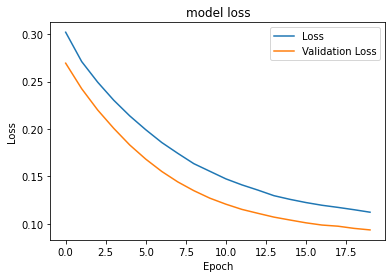

<Figure size 432x288 with 0 Axes>

In [159]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.figure()
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

In [42]:
# print(x_test.shape)
print("[INFO] classifying...")
# print(x_test[221].shape)
# print(y_test[221])
proba = model.predict(x_test)[300]
print(proba)
idxs = np.argsort(proba)[::-1] 
# loop over the indexes of the high confidence class labels
 
for (i, j) in enumerate(idxs):
	# build the label and draw the label on the image
  label = "{}: {:.2f}%".format(mlb.classes_[j], proba[j] * 100)
  print(label)

# show the probabilities for each of the individual labels
# for (label, p) in zip(mlb.classes_, proba): 
# 	print("{}: {:.2f}%".format(label, p * 100, p))
 

[INFO] classifying...
[0.01777652 0.02270016 0.01158424 0.0624416  0.05216824 0.11701382
 0.36049113 0.06180067 0.02941765 0.23753297 0.02707303]
Suc_khoe: 36.05%
Tin_tuc: 23.75%
Phap_luat: 11.70%
Giao_duc: 6.24%
Thi_truong: 6.18%
Khoa_hoc: 5.22%
Thi_truong_chung_khoan: 2.94%
Xe: 2.71%
Du_lich: 2.27%
Cong_nghe: 1.78%
Giai_tri: 1.16%


LSTM VANILA TRAINING


In [140]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Dense, Flatten, Dropout
from keras.layers import LSTM
from keras import backend as K
from keras.optimizers import Adam, SGD 
from keras.layers import LeakyReLU
from sklearn.metrics import classification_report
class LSTMModel(object): 
  @staticmethod
  def build(SIZE_TRAIN,num_classes, final_activation):    
    # define model
    model = Sequential()
    model.add(LSTM(200, activation='tanh', dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(100))
    model.add(Dense(num_classes, activation=final_activation)) 
    return model 

    
# khởi tạo model
EPOCHS = 20
INIT_LR = 1e-3
BS = 32 
n_features = 1

model_lstm = LSTMModel.build(SIZE_TRAIN=SIZE_TRAIN,num_classes=len(mlb.classes_),final_activation='softmax')
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
sgd = SGD(lr=0.001); 
model_lstm.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# model_lstm.summary() 
 


In [142]:
# x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],n_features))
# x_test = x_test.reshape((x_test.shape[0], x_test.shape[1],n_features))
H = model_lstm.fit(x_train, y_train, validation_data= (x_test,y_test),epochs=20, verbose=1, batch_size=512)

Train on 18119 samples, validate on 4530 samples
Epoch 1/20
18119/18119 [==============================] - 11s 600us/step - loss: 0.2644 - accuracy: 0.9113 - val_loss: 0.2338 - val_accuracy: 0.9163
Epoch 2/20
18119/18119 [==============================] - 10s 578us/step - loss: 0.2297 - accuracy: 0.9196 - val_loss: 0.1898 - val_accuracy: 0.9260
Epoch 3/20
18119/18119 [==============================] - 11s 586us/step - loss: 0.2050 - accuracy: 0.9264 - val_loss: 0.1653 - val_accuracy: 0.9350
Epoch 4/20
18119/18119 [==============================] - 11s 582us/step - loss: 0.1911 - accuracy: 0.9319 - val_loss: 0.1536 - val_accuracy: 0.9400
Epoch 5/20
18119/18119 [==============================] - 11s 580us/step - loss: 0.1810 - accuracy: 0.9364 - val_loss: 0.1430 - val_accuracy: 0.9449
Epoch 6/20
18119/18119 [==============================] - 11s 598us/step - loss: 0.1738 - accuracy: 0.9390 - val_loss: 0.1369 - val_accuracy: 0.9472
Epoch 7/20
18119/18119 [==============================] -

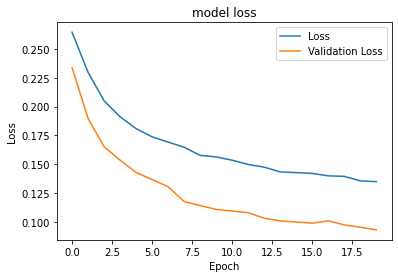

<Figure size 432x288 with 0 Axes>

In [143]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.figure()
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

In [137]:
# evaluate 
loss, acc = model_lstm.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100)) 

Test Accuracy: 96.092725


In [146]:
LABEL_ENCODE_PATH="/content/drive/My Drive/NLP/WordSmi/ModelClassify/Fasttext/lb_ft_sg_lstm.pkl"
ESTIMATE_PATH="/content/drive/My Drive/NLP/WordSmi/ModelClassify/Fasttext/estimator_ft_sg_lstm.h5"
FileStore(file_path=LABEL_ENCODE_PATH).save_pickle(obj=mlb)
FileStore(file_path=ESTIMATE_PATH).save_pickle(obj=model_lstm)

from keras.models import save_model, load_model

# Creates a HDF5 file 'ESTIMATE_PATH.h5' 
save_model(model_lstm, ESTIMATE_PATH) 

CNN + LSTM TRAINING

In [165]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Dense, Flatten, Dropout
from keras.layers import LSTM
from keras import backend as K
from keras.optimizers import Adam, SGD 
from keras.layers import LeakyReLU,Conv1D,MaxPooling1D
from sklearn.metrics import classification_report
class CNN_LSTM_Model(object): 
  @staticmethod
  def build(SIZE_TRAIN,num_classes, final_activation):    
    # define model
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(200))
    model.add(Dense(100))
    model.add(Dense(num_classes, activation=final_activation)) 
    return model 

    
# khởi tạo model
EPOCHS = 20
INIT_LR = 1e-3
BS = 32 
n_features = 1

model_cnnlstm = CNN_LSTM_Model.build(SIZE_TRAIN=SIZE_TRAIN,num_classes=len(mlb.classes_),final_activation='softmax')
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
sgd = SGD(lr=0.001); 
model_cnnlstm.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# model_lstm.summary() 
  

In [166]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],n_features))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1],n_features))
H = model_cnnlstm.fit(x_train, y_train, validation_data= (x_test,y_test),epochs=20, verbose=1, batch_size=512)

Train on 18119 samples, validate on 4530 samples
Epoch 1/20
18119/18119 [==============================] - 12s 637us/step - loss: 0.2346 - accuracy: 0.9172 - val_loss: 0.1755 - val_accuracy: 0.9329
Epoch 2/20
18119/18119 [==============================] - 6s 333us/step - loss: 0.1442 - accuracy: 0.9460 - val_loss: 0.1298 - val_accuracy: 0.9506
Epoch 3/20
18119/18119 [==============================] - 6s 324us/step - loss: 0.1162 - accuracy: 0.9566 - val_loss: 0.1115 - val_accuracy: 0.9579
Epoch 4/20
18119/18119 [==============================] - 6s 314us/step - loss: 0.1010 - accuracy: 0.9620 - val_loss: 0.1020 - val_accuracy: 0.9618
Epoch 5/20
18119/18119 [==============================] - 6s 311us/step - loss: 0.0964 - accuracy: 0.9634 - val_loss: 0.1000 - val_accuracy: 0.9625
Epoch 6/20
18119/18119 [==============================] - 6s 310us/step - loss: 0.0905 - accuracy: 0.9661 - val_loss: 0.0964 - val_accuracy: 0.9639
Epoch 7/20
18119/18119 [==============================] - 6s 3

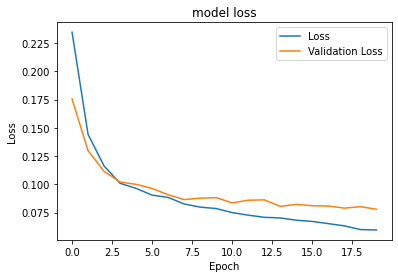

<Figure size 432x288 with 0 Axes>

In [167]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.figure()
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

In [169]:
# evaluate 
loss, acc = model_cnnlstm.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100)) 

# lb: label encodem 
# ft: fast text 
# sg: skip gram 
# cnn: convolution neural network 
# lstm: long short term memory 
# nn: neural network

Test Accuracy: 97.152328


In [170]:
LABEL_ENCODE_PATH="/content/drive/My Drive/NLP/WordSmi/ModelClassify/Fasttext/lb_ft_sg_cnn_lstm.pkl" 
ESTIMATE_PATH="/content/drive/My Drive/NLP/WordSmi/ModelClassify/Fasttext/estimator_ft_sg_cnn_lstm.h5"
FileStore(file_path=LABEL_ENCODE_PATH).save_pickle(obj=mlb)
FileStore(file_path=ESTIMATE_PATH).save_pickle(obj=model_cnnlstm)

from keras.models import save_model, load_model

# Creates a HDF5 file 'ESTIMATE_PATH.h5' 
save_model(model_cnnlstm, ESTIMATE_PATH) 

In [174]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Dense, Flatten, Dropout
from keras.layers import LSTM
from keras import backend as K
from keras.optimizers import Adam, SGD 
from keras.layers import LeakyReLU,Conv1D,MaxPooling1D,Bidirectional
from sklearn.metrics import classification_report
class RNN_Model(object): 
  @staticmethod
  def build(SIZE_TRAIN,num_classes, final_activation):    
    # define model
    model = Sequential()
    model.add(Bidirectional(LSTM(200, activation='tanh', dropout=0.2, recurrent_dropout=0.2))) 
    model.add(Dense(100))
    model.add(Dense(num_classes, activation=final_activation)) 
    return model 

    
# khởi tạo model
EPOCHS = 20
INIT_LR = 1e-3
BS = 32 
n_features = 1

model_rnn = RNN_Model.build(SIZE_TRAIN=SIZE_TRAIN,num_classes=len(mlb.classes_),final_activation='softmax')
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
sgd = SGD(lr=0.001); 
model_rnn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# model_lstm.summary() 
  

In [175]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],n_features))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1],n_features))
H = model_rnn.fit(x_train, y_train, validation_data= (x_test,y_test),epochs=20, verbose=1, batch_size=512)

Train on 18119 samples, validate on 4530 samples
Epoch 1/20
18119/18119 [==============================] - 21s 1ms/step - loss: 0.2582 - accuracy: 0.9133 - val_loss: 0.2006 - val_accuracy: 0.9242
Epoch 2/20
18119/18119 [==============================] - 20s 1ms/step - loss: 0.1989 - accuracy: 0.9271 - val_loss: 0.1610 - val_accuracy: 0.9402
Epoch 3/20
18119/18119 [==============================] - 20s 1ms/step - loss: 0.1701 - accuracy: 0.9364 - val_loss: 0.1385 - val_accuracy: 0.9481
Epoch 4/20
18119/18119 [==============================] - 20s 1ms/step - loss: 0.1562 - accuracy: 0.9419 - val_loss: 0.1281 - val_accuracy: 0.9519
Epoch 5/20
18119/18119 [==============================] - 21s 1ms/step - loss: 0.1460 - accuracy: 0.9461 - val_loss: 0.1236 - val_accuracy: 0.9536
Epoch 6/20
18119/18119 [==============================] - 21s 1ms/step - loss: 0.1384 - accuracy: 0.9489 - val_loss: 0.1133 - val_accuracy: 0.9578
Epoch 7/20
18119/18119 [==============================] - 20s 1ms/ste

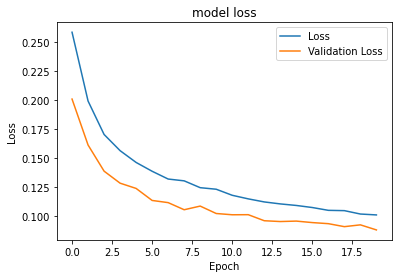

<Figure size 432x288 with 0 Axes>

In [176]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.figure()
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

In [177]:
# evaluate 
loss, acc = model_rnn.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100)) 

# lb: label encodem 
# ft: fast text 
# sg: skip gram 
# cnn: convolution neural network 
# lstm: long short term memory 
# nn: neural network

Test Accuracy: 96.891439


In [178]:
LABEL_ENCODE_PATH="/content/drive/My Drive/NLP/WordSmi/ModelClassify/Fasttext/lb_ft_sg_rnn.pkl" 
ESTIMATE_PATH="/content/drive/My Drive/NLP/WordSmi/ModelClassify/Fasttext/estimator_ft_sg_rnn.h5"
FileStore(file_path=LABEL_ENCODE_PATH).save_pickle(obj=mlb)
FileStore(file_path=ESTIMATE_PATH).save_pickle(obj=model_rnn)

from keras.models import save_model, load_model

# Creates a HDF5 file 'ESTIMATE_PATH.h5' 
save_model(model_rnn, ESTIMATE_PATH) 

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/data/cooking.stackexchange.tar.gz && tar xvzf cooking.stackexchange.tar.gz
!head cooking.stackexchange.txt

--2020-06-19 08:35:23--  https://dl.fbaipublicfiles.com/fasttext/data/cooking.stackexchange.tar.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.75.142, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 457609 (447K) [application/x-tar]
Saving to: ‘cooking.stackexchange.tar.gz’

cooking.stackexchan 100%[===================>] 446.88K  1.22MB/s    in 0.4s    

2020-06-19 08:35:24 (1.22 MB/s) - ‘cooking.stackexchange.tar.gz’ saved [457609/457609]

cooking.stackexchange.id
cooking.stackexchange.txt
readme.txt
__label__sauce __label__cheese How much does potato starch affect a cheese sauce recipe?
__label__food-safety __label__acidity Dangerous pathogens capable of growing in acidic environments
__label__cast-iron __label__stove How do I cover up the white spots on my cast iron stove?
__label__restaurant Michelin Three Star Restaurant; but if 

In [ ]:
from underthesea import sent_tokenize
data_process = []
for index in tqdm_notebook(xrange(len(data_train)), desc='build dataset'):
  item = data_train[index]
  for sentence in sent_tokenize(item['content']):
    dat = dict(data_train[index])
    dat['content'] = '__label__'+ item['category']+' ' + NLP(sentence).segmentation()
    data_process.append(dat)

In [ ]:
with open('/content/drive/My Drive/NLP/WordSmi/Fasttext/data/data_train_ft.news.txt','w') as f:
    for i in data_process:
        f.write(i['content']+'\n')

In [ ]:
%cd /content/drive/My Drive/NLP/WordSmi/Fasttext/data
!wc data_train_ft.news.txt

/content/drive/My Drive/NLP/WordSmi/Fasttext/data
   515053  14944997 110119224 data_train_ft.news.txt


In [ ]:
import fasttext

In [ ]:
!head -n 500000 data_train_ft.news.txt > news.train.txt
!tail -n 15053 data_train_ft.news.txt > news.valid.txt

In [ ]:
model = fasttext.train_supervised(input="news.train.txt", lr=0.1, epoch=25, wordNgrams=6, bucket=200000, dim=5000, loss='ova')
model.save_model("model_news.bin")

In [ ]:
 model.test("news.valid.txt", k=-1)

(15053, 0.047619047619047616, 1.0)

In [ ]:

with open('news.valid.txt','r') as f:
  a = f.readlines()  
  random.shuffle(a) 
  for i in a[100:140]: 
    txt = ' '.join(i.split(' ')[1:]).replace('\n','')
    label = i.split(' ')[0]
    print(label,txt)
    print(model.predict(txt))
    print('===================\n')

__label__Xe Ngoài_ra , theo theo_dõi của chúng_tôi , giá xăng tại Việt_Nam tiếp_tục tăng vào cuối năm 2013 , và đầu năm 2014 .
(('__label__Doanh_nghiep',), array([0.74338043]))

__label__The_gioi Thực_tế , trước sự bùng_nổ của các phương_tiện thanh_toán trực_tuyến và di_động , ngày_càng nhiều người Trung_Quốc lì_xì cho nhau bằng hồng bao điện_tử .
(('__label__Cong_nghe',), array([0.47587857]))

__label__The_gioi Hãng tin cũng vừa trích lại bản tin của .
(('__label__Cong_nghe',), array([0.43986785]))

__label__The_gioi Báo cũng đưa tin tương_tự .
(('__label__Cong_nghe',), array([0.96754324]))

__label__The_gioi Nhiều phóng_viên nước_ngoài , như một nhóm phóng_viên của Hãng tin Reuters , đã tranh_thủ rủ nhau đi khám_phá món bánh_mì ở Hà_Nội , và phóng_viên Hyonhee_Shin đã chia_sẻ lại hình_ảnh của họ tại một tiệm trên phố Hàn_Thuyên .
(('__label__Doanh_nghiep',), array([0.28170961]))

__label__Cong_nghe 3 .
(('__label__Doanh_nghiep',), array([0.73901486]))

__label__The_gioi Các hành_khác

In [ ]:
model.predict("Chưa năm nào các trường đại học sử dụng nhiều phương thức tuyển sinh và giảm mạnh chỉ tiêu xét điểm kỳ thi chung như năm nay. Thay đổi này khiến thí sinh cần cân nhắc nhiều hơn trong việc lựa chọn phương thức xét tuyển. ?")

(('__label__Giao_duc',), array([0.59696656]))